In [1]:
import pandas as pd


In [2]:
print("hello")

hello


In [16]:
out = pd.read_csv('result.csv')  

def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')
print_full(out)

                                    name  iterations     real_time  \
0                        CM_diag/16_mean           5  4.598290e+04   
1                      CM_diag/16_median           5  4.584480e+04   
2                      CM_diag/16_stddev           5  6.683780e+02   
3                        CM_diag/32_mean           5  1.089410e+05   
4                      CM_diag/32_median           5  1.087750e+05   
5                      CM_diag/32_stddev           5  1.391830e+03   
6                        CM_diag/48_mean           5  2.482020e+09   
7                      CM_diag/48_median           5  2.546380e+09   
8                      CM_diag/48_stddev           5  1.298990e+08   
9                        CM_diag/64_mean           5  8.426160e+09   
10                     CM_diag/64_median           5  8.421070e+09   
11                     CM_diag/64_stddev           5  6.862960e+07   
12                       CM_diag/80_mean           5  2.361570e+10   
13                  

In [4]:
out = pd.read_csv('build/tests/Release/result.csv')  
out = out.drop(["iterations", "time_unit", "bytes_per_second", "items_per_second", "label","error_occurred", "error_message", "cpu_time"], axis =1 )
spill_res = out["name"].str.rsplit("/")
print(spill_res)
#spill_res = spill_res.spill('_')
names = ["type", "size_tmp"]
data = spill_res.to_list()

new_df = pd.DataFrame(data, columns=names)
res = pd.concat([new_df, out], axis=1)
res = res.drop("name", axis = 1)
print(res)

spill_res = res["size_tmp"].str.rsplit("_")
print(spill_res)
names = ["size", "what"]
data = spill_res.to_list()

new_df = pd.DataFrame(data, columns=names)
res = pd.concat([new_df, res], axis=1)
res = res.drop("size_tmp", axis = 1)
print(res)




res["size"]  =  pd.to_numeric(res["size"])

0                          [CM_diag, 16_mean]
1                        [CM_diag, 16_median]
2                        [CM_diag, 16_stddev]
3                          [CM_diag, 32_mean]
4                        [CM_diag, 32_median]
                       ...                   
85    [CPU_diag_calculations_only, 64_median]
86    [CPU_diag_calculations_only, 64_stddev]
87      [CPU_diag_calculations_only, 80_mean]
88    [CPU_diag_calculations_only, 80_median]
89    [CPU_diag_calculations_only, 80_stddev]
Name: name, Length: 90, dtype: object
                          type   size_tmp     real_time  iterations.1
0                      CM_diag    16_mean  4.598290e+04           283
1                      CM_diag  16_median  4.584480e+04           283
2                      CM_diag  16_stddev  6.683780e+02             0
3                      CM_diag    32_mean  1.089410e+05          1078
4                      CM_diag  32_median  1.087750e+05          1078
..                         ...      

In [5]:
res.dtypes

size              int64
what             object
type             object
real_time       float64
iterations.1      int64
dtype: object

In [6]:
res

,size,what,type,real_time,iterations.1
0,16,mean,CM_diag,4.598290e+04,283
1,16,median,CM_diag,4.584480e+04,283
2,16,stddev,CM_diag,6.683780e+02,0
3,32,mean,CM_diag,1.089410e+05,1078
4,32,median,CM_diag,1.087750e+05,1078
...,...,...,...,...,...
85,64,median,CPU_diag_calculations_only,6.138170e+08,4187
86,64,stddev,CPU_diag_calculations_only,7.749080e+06,0
87,80,mean,CPU_diag_calculations_only,1.446300e+09,6413
88,80,median,CPU_diag_calculations_only,1.452300e+09,6413


In [7]:
OCL_diag=res["type"] == "OCL_diag"
CM_diag  = res["type"] == "CM_diag"
CPU_diag  = res["type"] == "CPU_diag"
CPU_diag_calculations_only = res["type"]== "CPU_diag_calculations_only"
CM_diag_calculations_only = res["type"]== "CM_diag_calculations_only"
OCL_diag_calculations_only = res["type"]== "OCL_diag_calculations_only"

mean = res["what"] == "mean"



In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\itetyush\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\itetyush\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\itetyush\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


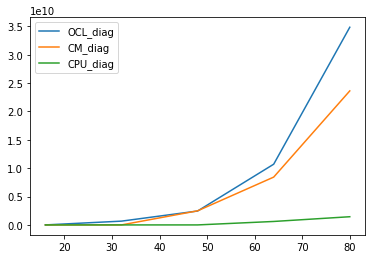

In [9]:
plt.plot(res[OCL_diag][mean]["size"], res[OCL_diag][mean]["real_time"],label='OCL_diag')
plt.plot(res[CM_diag][mean]["size"], res[CM_diag][mean]["real_time"],label='CM_diag')
plt.plot(res[CPU_diag][mean]["size"], res[CPU_diag][mean]["real_time"],label='CPU_diag')
plt.legend()
plt.show()

C:\Users\itetyush\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\itetyush\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\itetyush\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


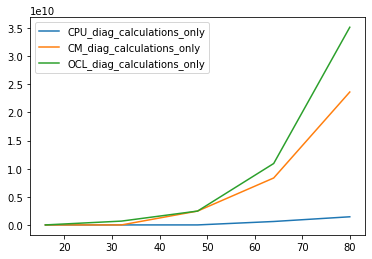

In [10]:
plt.plot(res[CPU_diag_calculations_only][mean]["size"], res[CPU_diag_calculations_only][mean]["real_time"],label='CPU_diag_calculations_only')
plt.plot(res[CM_diag_calculations_only][mean]["size"], res[CM_diag_calculations_only][mean]["real_time"],label='CM_diag_calculations_only')
plt.plot(res[OCL_diag_calculations_only][mean]["size"], res[OCL_diag_calculations_only][mean]["real_time"],label='OCL_diag_calculations_only')
plt.legend()
plt.show()